In [9]:
import numpy as np
import pandas as pd
import os
import base_functions as bf
import pickle
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn import metrics
import seaborn as sns
import plot_base_functions as pbf
from nilearn import connectome, plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# load trained model
D = pickle.load(open('./data/trained_model.pkl', 'rb'))
trained_clf = D['trained_clf']

## Apply to dataset2

In [11]:
D = pickle.load(open('./data/dataset2_connectivity.pkl', 'rb'))
all_session_conn_vec = D['all_session_conn_vec']
all_session_subjects = D['all_session_subjects']
all_session = D['all_session']
nsubj_list = [conn_vec.shape[0] for conn_vec in all_session_conn_vec]
print(nsubj_list)
all_session

[38, 38, 30, 30]


['HC_TSD', 'HC_TSD', 'PT_BS', 'PT_TSD']

In [12]:
all_scores = []
for vec in all_session_conn_vec:
    vec = np.arctanh(vec)
    scores = trained_clf.predict_proba(vec)[:,1]
    all_scores.append(scores.reshape(-1))

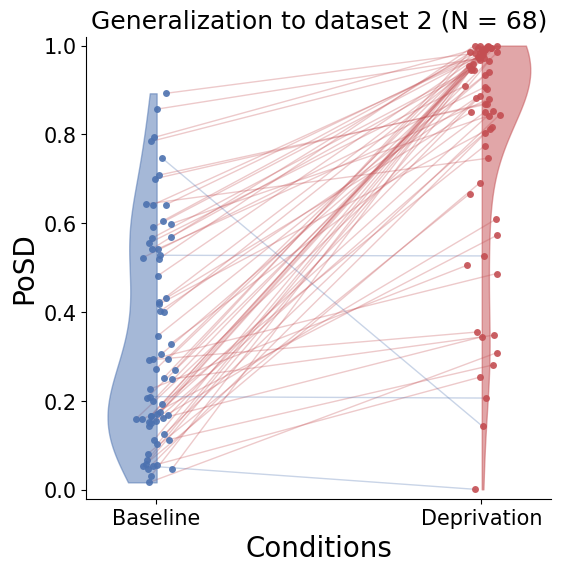

In [14]:

deep_colors = sns.color_palette("deep", as_cmap=True)
use_colors = [deep_colors[0], deep_colors[3]]


BS = np.concatenate([all_scores[0],all_scores[2]])
SD = np.concatenate([all_scores[1],all_scores[3]])


df = pd.DataFrame({'C1': BS,
                   'C2': SD})

fig, ax = pbf.plot_paired_measures(df, use_colors)
ax.set_ylim([-0.02, 1.02])

ax.set_xlabel("Conditions", fontsize=20)
ax.set_ylabel("PoSD", fontsize=20)
ax.set_title(f"Generalization to dataset 2 (N = {BS.shape[0]})", fontsize=18)
ax.set_xticklabels(['Baseline', 'Deprivation'])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# fig.savefig(f'./results/generalization_dataset2.pdf', bbox_inches='tight')

# Apply to dataset 3

In [20]:
D = pickle.load(open('./data/dataset3_connectivity.pkl', 'rb'))
all_session_conn_vec = D['all_session_conn_vec']
all_session_subjects = D['all_session_subjects']
all_session = D['all_session']

all_scores = []
for vec in all_session_conn_vec:
    vec = np.arctanh(vec)
    scores = trained_clf.predict_proba(vec)[:,1]
    all_scores.append(scores.reshape(-1))

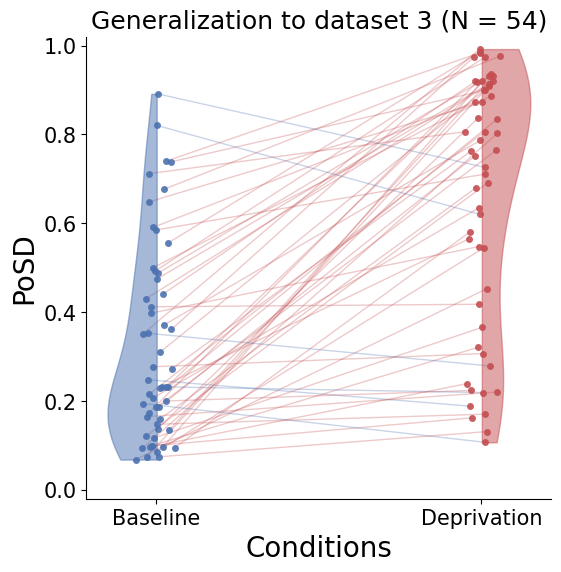

In [21]:
BS = all_scores[0]
SD = all_scores[1]


df = pd.DataFrame({'C1': BS,
                   'C2': SD})

fig, ax = pbf.plot_paired_measures(df, use_colors)
ax.set_ylim([-0.02, 1.02])

ax.set_xlabel("Conditions", fontsize=20)
ax.set_ylabel("PoSD", fontsize=20)
ax.set_title(f"Generalization to dataset 3 (N = {BS.shape[0]})", fontsize=18)
ax.set_xticklabels(['Baseline', 'Deprivation'])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# fig.savefig(f'./Figures/generalization_dataset3.pdf', bbox_inches='tight')

# Apply to dataset 4

In [26]:
D = pickle.load(open('./data/dataset4_connectivity.pkl', 'rb'))
all_session_conn_vec = D['all_session_conn_vec']
all_session_subjects = D['all_session_subjects']
all_session = D['all_session']

all_scores = []
for vec in all_session_conn_vec:
    vec = np.arctanh(vec)
    scores = trained_clf.predict_proba(vec)[:,1]
    all_scores.append(scores.reshape(-1))

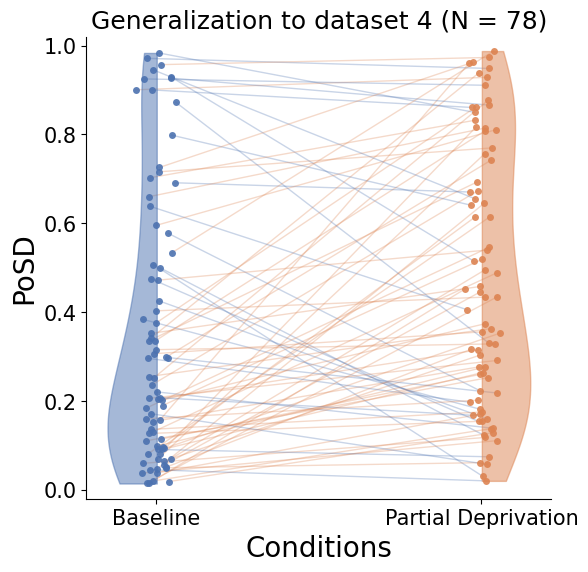

In [27]:
deep_colors = sns.color_palette("deep", as_cmap=True)
use_colors = [deep_colors[0], deep_colors[1]]

BS = all_scores[0].copy()
SD = all_scores[1].copy()


df = pd.DataFrame({'C1': BS,
                   'C2': SD})

fig, ax = pbf.plot_paired_measures(df, use_colors)
ax.set_ylim([-0.02, 1.02])

ax.set_xlabel("Conditions", fontsize=20)
ax.set_ylabel("PoSD", fontsize=20)
ax.set_title(f"Generalization to dataset 4 (N = {df.shape[0]})", fontsize=18)
ax.set_xticklabels(['Baseline', 'Partial Deprivation'])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# fig.savefig(f'./results/generalization_dataset4.pdf', bbox_inches='tight')

# Apply to dataset 5

In [22]:
D = pickle.load(open('./data/dataset5_connectivity.pkl', 'rb'))
all_conn_vec = D['all_conn_vec']
all_subjects = D['all_subjects']
all_TST = D['all_TST']

pred_scores = trained_clf.predict_proba(np.arctanh(all_conn_vec))[:,1]

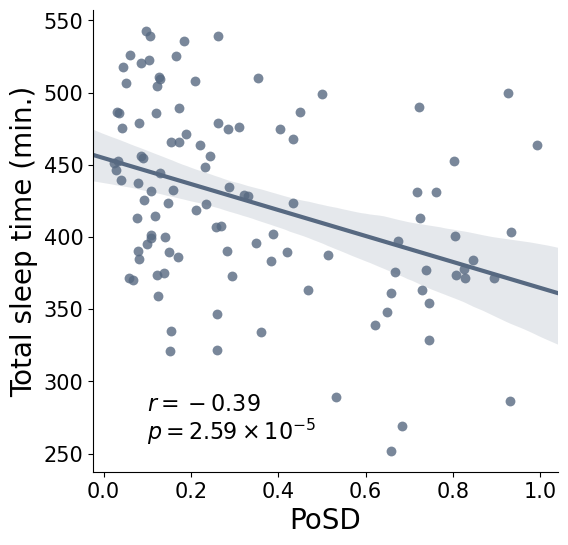

In [25]:
from scipy import stats
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))

deep_colors = sns.color_palette("deep", as_cmap=True)
deep_colors = [[87/255, 105/255, 129/255]]
y = all_TST.copy()
x = pred_scores.copy()

rval, pvals = stats.pearsonr(x, y)
fig, ax = plt.subplots(figsize=(6, 6))
# ax.scatter(pred_scores, measures[:,-3])
ax = sns.regplot(x=x, y=y, color=deep_colors[0], truncate=False, marker='.',
                 scatter_kws={'alpha':.8, 's':200, 'edgecolors':None, 'linewidths':0}, 
                 line_kws={'color':deep_colors[0], 'lw':3})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Total sleep time (min.)", fontsize=20)
ax.set_xlabel("PoSD", fontsize=20)
# ax.text(0.1, 280, f'$r$ = {np.round(rval,2)}', fontsize=16)
ax.text(0.1, 280, r"$r = {0:.2f}$".format(np.round(rval,2)), fontsize=16)
ax.text(0.1, 260, r"$p = {0:s}$".format(as_si(pvals,2)), fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=15)
# fig.savefig('./results/generalization_dataset5.pdf', bbox_inches='tight')